In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('zomato.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [44]:
df.shape

(631, 7)

In [45]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02
mean,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07
std,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,62.549999,63.450001,61.125000,62.074998,62.074998,2.800788e+07
50%,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07
75%,124.474998,126.750000,121.525002,124.599998,124.599998,7.525439e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,6.948953e+08


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


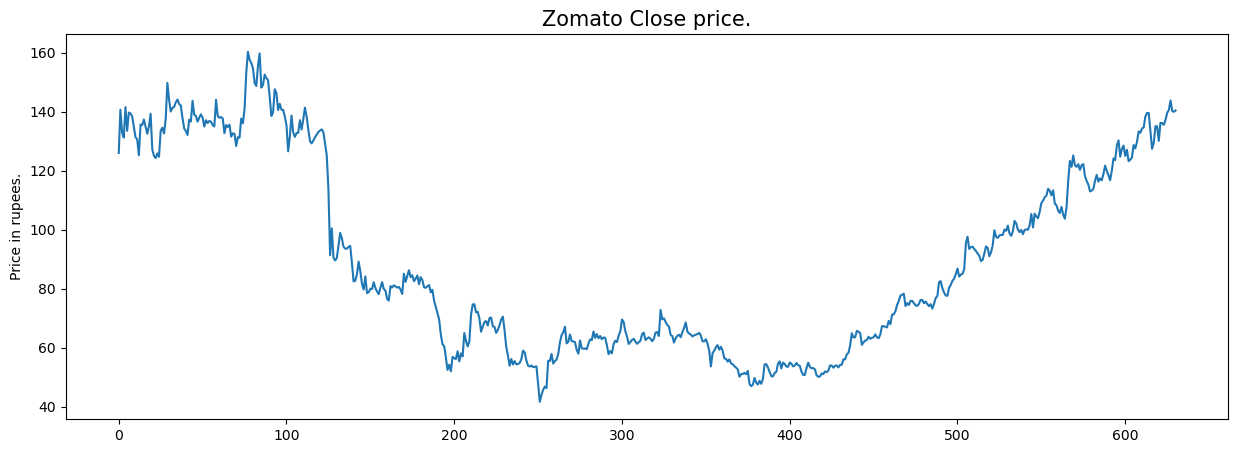

In [47]:
# EDA
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Zomato Close price.', fontsize=15)
plt.ylabel('Price in rupees.')
plt.show()

In [48]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [49]:
df[df['Close'] == df['Adj Close']].shape

(631, 7)

In [50]:
df = df.drop(['Adj Close'], axis=1)

In [51]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

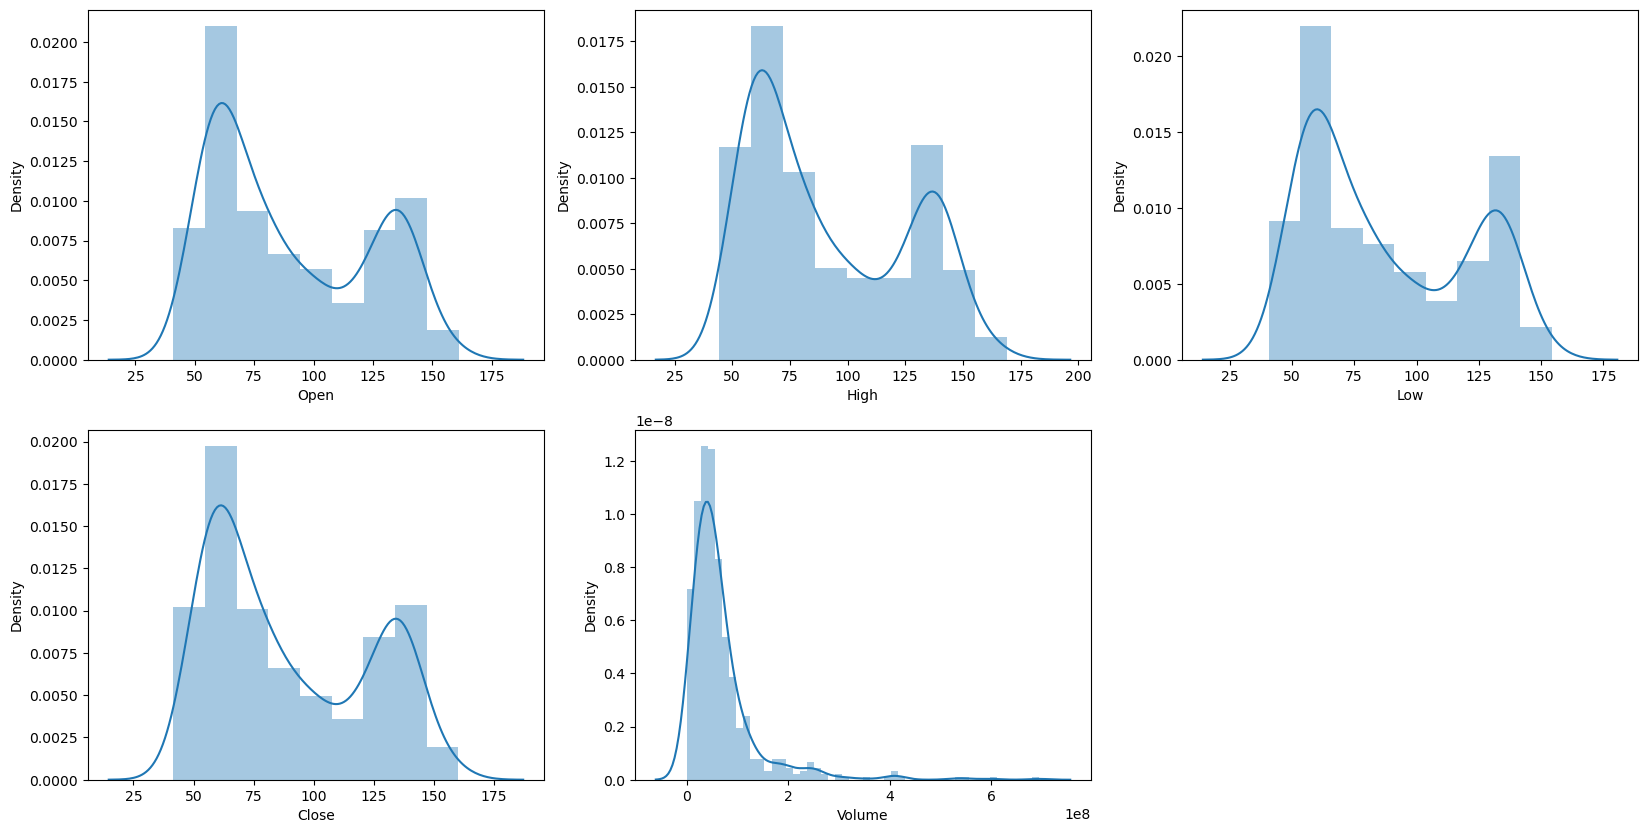

In [52]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

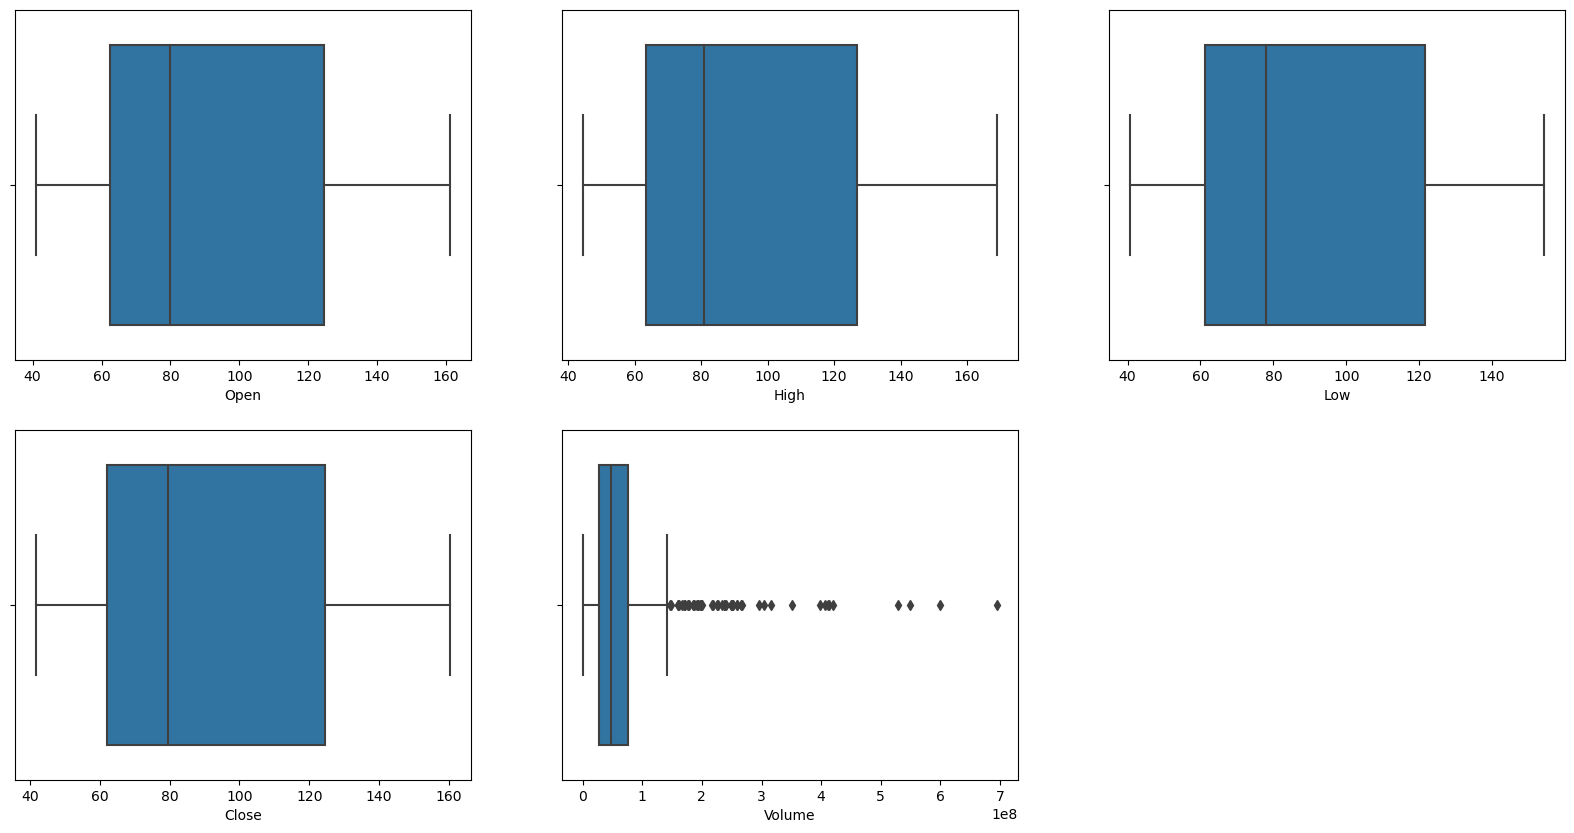

In [53]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

In [54]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,694895290,23,7,2021
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,249723854,26,7,2021
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,240341900,27,7,2021
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,159793731,28,7,2021
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,117973089,29,7,2021


In [55]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,694895290,23,7,2021,0
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,249723854,26,7,2021,0
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,240341900,27,7,2021,0
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,159793731,28,7,2021,0
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,117973089,29,7,2021,0


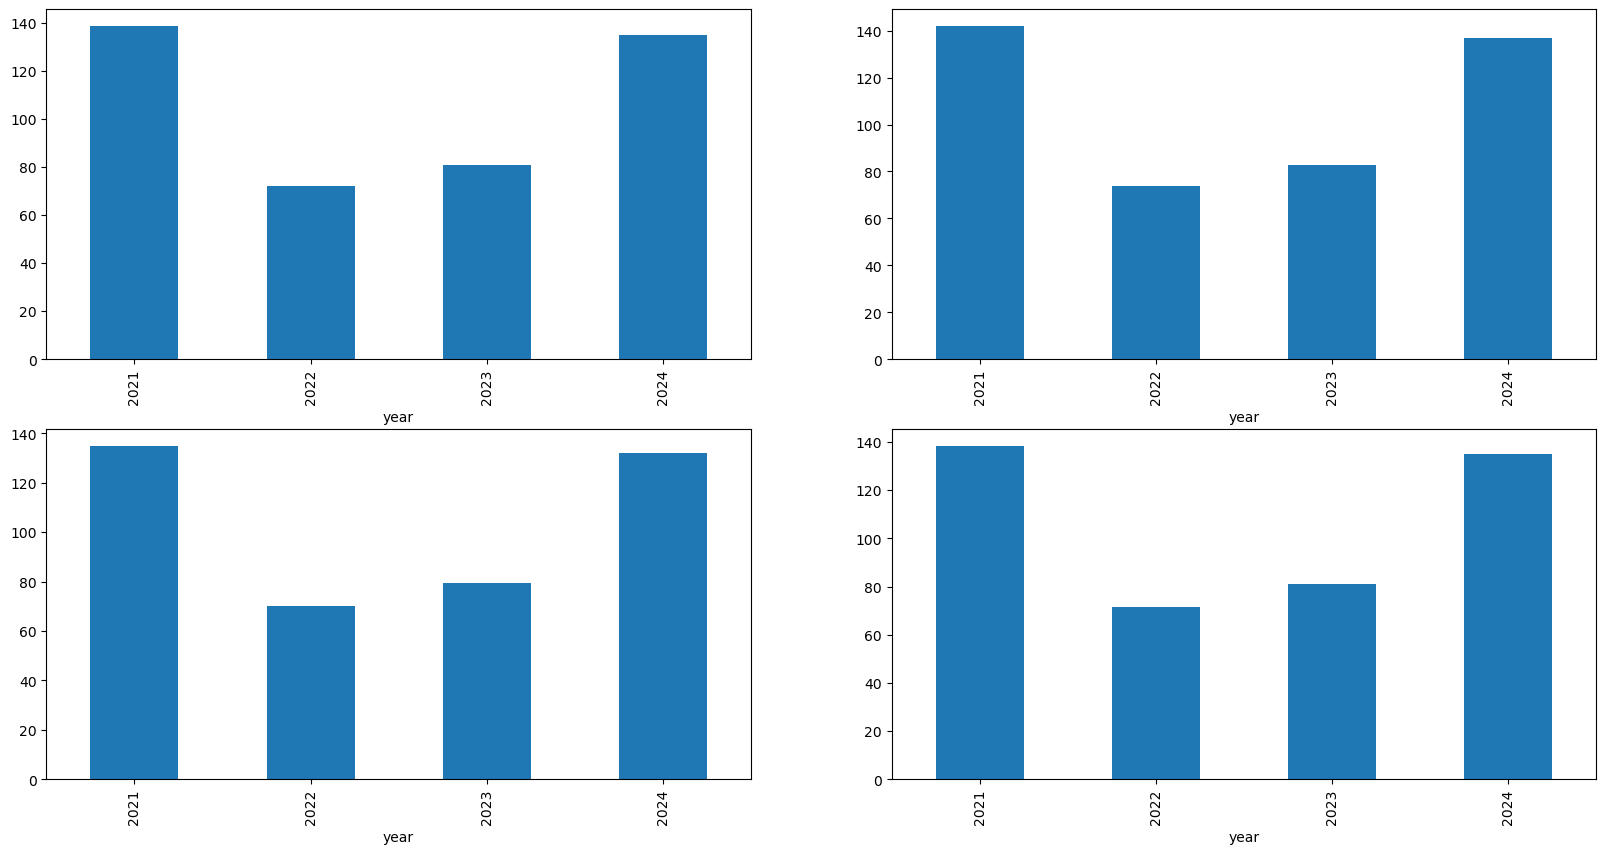

In [56]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [57]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,89.880143,91.814473,87.677991,89.649522,7.606076e+07,15.710526,6.251196,2022.358852
1,90.268545,91.877465,88.241784,89.821831,5.015897e+07,15.924883,8.126761,2022.178404


In [58]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

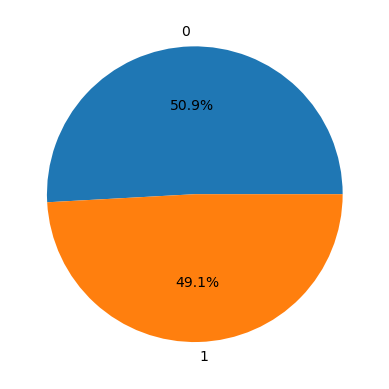

In [59]:
plt.pie(df['target'].value_counts().values, 
    labels=[0, 1], autopct='%1.1f%%')
plt.show()

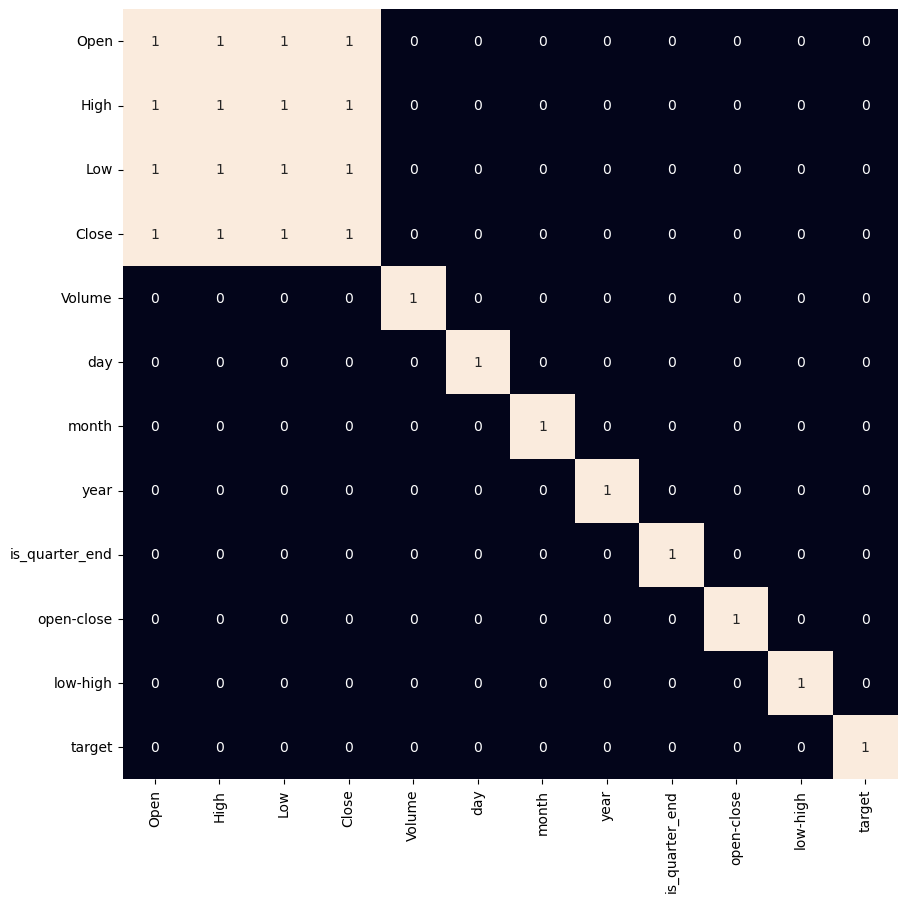

In [60]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [61]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(567, 3) (64, 3)


In [62]:
vmodels = [LogisticRegression(), SVR(kernel='poly',probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9950648477757585
Validation Accuracy :  0.5478515625



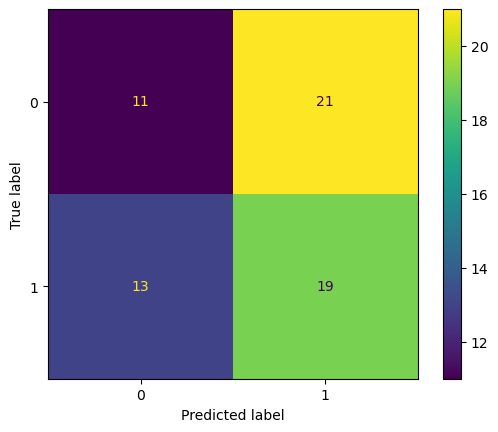

In [63]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

In [64]:
# Prediction using linear regression
df.Volume.median()

47597101.0

In [65]:
import math
Volume_median=math.floor(df.Volume.median())
Volume_median

47597101

In [66]:
df.Volume=df.Volume.fillna(Volume_median)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,694895290,23,7,2021,0,-10.000000,-23.899994,1
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,249723854,26,7,2021,0,-14.299996,-18.449997,0
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,240341900,27,7,2021,0,8.800003,-20.050003,0
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,159793731,28,7,2021,0,-0.199997,-11.449997,1
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,117973089,29,7,2021,0,-6.600006,-11.800003,0


In [67]:
reg=linear_model.LinearRegression()
reg.fit(df[['Open','High','Low','Close']],df.Volume)

LinearRegression()

In [68]:
reg.coef_

array([-11168313.64620971,  20101156.13646464,  -7572080.49411055,
        -2384143.01422337])

In [69]:
reg.intercept_

105808608.20829356

In [70]:
reg.predict([[145.000000,145.399994,138.250000,140.250000]])

array([27894925.08729804])

In [71]:
-11168313.64620971*145.000000+20101156.13646464*145.399994+-7572080.49411055*138.250000+-2384143.01422337*140.250000+105808608.20829356

27894925.087296367

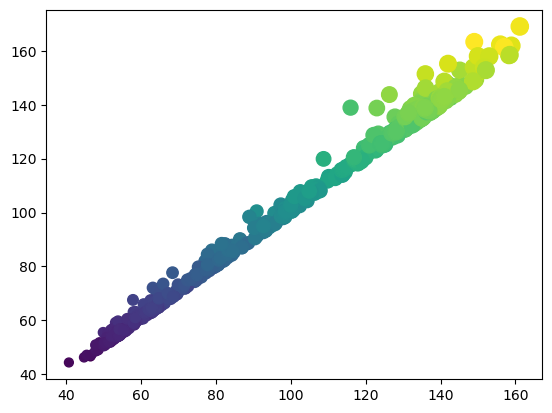

In [72]:
plt.scatter(df['Open'],df['High'],df['Low'],df['Close'])

In [73]:
x=df['High']
x.head()

0    138.899994
1    143.750000
2    147.800003
3    135.000000
4    144.000000
Name: High, dtype: float64

In [74]:
y=df['Low']
y.head()

0    115.000000
1    125.300003
2    127.750000
3    123.550003
4    132.199997
Name: Low, dtype: float64

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [76]:
len(x_train)

504

In [77]:
len(y_train)

504

In [78]:
len(x_test)

127

In [79]:
len(y_test)

127

In [80]:
clf=LinearRegression()

In [81]:
x_test

497     83.199997
369     54.299999
269     65.250000
535    105.000000
228     70.000000
          ...    
288     65.699997
72     133.600006
532    100.750000
254     47.200001
537    100.949997
Name: High, Length: 127, dtype: float64

In [82]:
y_test

497     79.300003
369     52.500000
269     62.150002
535    101.650002
228     66.500000
          ...    
288     62.400002
72     130.600006
532     97.000000
254     44.549999
537     98.250000
Name: Low, Length: 127, dtype: float64

In [83]:
clf.fit(x_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 54.200001  75.099998  60.599998  69.699997  80.550003  64.050003
 137.75     152.       118.349998 117.800003 138.199997 140.
 144.        81.5       55.150002  53.700001 131.449997  55.049999
  62.049999 139.25      58.75      54.400002 163.300003  94.849998
  63.700001 131.75      69.699997 133.649994  85.150002  83.300003
 125.        87.       137.399994  83.400002  60.799999  81.849998
 161.850006 138.        66.599998  56.150002  88.400002  51.
 136.5       64.800003 128.699997  61.5       86.        63.200001
  56.400002 146.850006  64.900002 142.449997  51.299999 135.100006
  62.950001 129.449997  66.599998 137.800003  71.150002 135.
 139.199997  88.300003 101.400002  77.        67.449997 142.899994
  53.900002  56.75      77.599998  63.200001  62.700001  63.650002
  94.300003 141.550003  59.        79.650002 135.5       70.199997
 141.5       52.150002  59.        49.099998 105.900002 135.050003
  65.400002  84.300003 134.350006  56.549999  62.5       82.449997
  62.799999  64.599998 125.5       75.300003 141.       138.399994
 139.5       61.450001  54.5       76.349998 137.399994  66.849998
 141.800003 132.899994 108.599998  69.699997 133.850006  64.300003
 107.699997  81.800003  54.150002 125.150002  87.25      76.150002
  87.150002  82.300003 145.100006 135.399994  69.800003 134.5
 107.150002 108.        84.800003 118.25      90.099998 138.
 130.25      59.650002  63.75      75.449997  63.5      141.449997
  44.400002  66.449997  53.200001  83.199997 153.899994  70.
 138.899994 146.149994  55.799999  54.150002 131.        95.75
  54.5       54.200001 148.600006  64.099998  84.599998 104.400002
  64.099998  69.400002 138.800003  64.400002 143.75      55.75
  81.599998  65.25      75.       144.75     140.75      54.700001
  63.75      63.200001 131.449997  58.349998  98.849998  86.099998
  67.5      151.399994  68.900002 102.849998 123.099998 100.400002
 139.        67.25     139.550003  54.75      76.       119.199997
  63.400002  95.       119.699997  72.        51.049999 125.199997
 145.        60.599998  66.699997  67.599998  54.400002  65.449997
 140.75      71.900002 101.599998  68.199997 123.400002  68.300003
  99.75     127.949997  66.400002  80.949997  78.800003  65.949997
 134.300003  96.099998  56.75      56.400002  69.25      64.849998
  54.75     125.        81.849998  63.650002  59.549999 142.699997
  65.        88.400002 109.800003  63.650002  68.599998  76.949997
  77.25      66.800003  93.349998  76.199997  82.       113.25
  75.550003  77.349998  57.700001  74.900002  84.400002 138.5
 146.850006  77.        63.5      114.5       63.950001  64.900002
  52.5       78.800003  60.799999  52.25      55.200001  54.450001
  83.400002 137.699997 156.399994  75.849998  60.549999  68.
 129.199997 119.300003  82.900002  65.199997 123.300003  85.150002
  56.450001 142.850006  81.       100.449997  59.        98.349998
  65.150002  60.400002 114.199997 113.900002  58.700001  99.300003
 157.899994  54.400002  74.849998 155.199997  87.       142.899994
  68.400002  92.75     138.75      80.699997 102.550003 145.
 144.949997  56.75      75.25     138.449997 137.300003  70.5
  74.849998  85.300003  69.199997  62.900002  80.300003  55.299999
  51.799999  88.699997  65.449997 128.5      102.75     100.800003
 120.5      127.599998  55.400002  61.549999 142.       135.
  98.400002  78.449997  95.800003  96.150002  98.5       60.799999
 140.399994 132.399994  79.800003 139.75     144.        64.
  56.200001  72.150002 115.75      55.900002  75.25     107.199997
 132.399994 129.800003  85.949997  57.25     132.399994  51.799999
 111.800003 127.150002  85.25      56.5       85.25     136.149994
 123.900002  59.75      47.25      98.599998  64.75      64.650002
  73.199997 139.149994 130.899994  84.5       66.199997  65.699997
 134.449997  64.699997 125.699997 138.800003  56.700001  63.200001
 137.350006  71.849998  61.450001  65.650002  72.099998  80.650002
  55.299999  83.949997  52.049999  64.449997 134.5      129.5
 108.        55.549999 133.449997 134.350006  82.       104.449997
 144.25      61.25      81.900002 115.099998 109.25      62.
 140.399994  48.549999 134.600006 137.5      125.550003  62.849998
  63.099998 158.25     122.550003 135.449997  61.150002  52.450001
  95.        64.900002 146.399994  54.5       66.900002  80.349998
 137.300003  73.550003 139.75      55.799999  80.650002  71.900002
 119.900002  56.150002  63.099998  80.5       65.449997 136.199997
 136.800003  56.       137.699997 143.600006  91.400002 136.899994
 138.899994  50.900002  70.        55.       143.899994  93.25
 139.5      133.149994  64.900002  56.700001  79.599998  65.699997
  60.700001  55.950001  49.25     169.        97.849998  66.
  69.699997  80.599998 104.900002  52.5       64.699997  55.25
  68.25      54.950001  82.400002 132.5       65.300003  66.150002
  79.099998  63.150002 143.5       63.25      59.75      68.300003
  56.799999  59.200001  56.349998  62.        62.5       64.949997
  76.400002 142.       141.       143.800003  53.700001  66.650002
  60.5       63.849998  46.299999  72.699997  51.450001 140.800003
 101.099998 161.300003  64.699997  54.25     136.899994 101.199997
 152.75      54.       125.599998 134.        62.799999  98.
 137.899994 100.300003  60.650002  68.599998  77.699997  83.900002
 139.899994  51.700001  95.400002  50.549999 162.25     108.150002
  51.900002  65.        64.900002  46.650002  96.449997  70.75
 130.899994 126.349998 102.5       68.800003  84.650002  50.700001].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.